# Studying the Fuel Economy of Cars Over Time
**Ryan Eckenrod, Nathaniel Foote, Erica Phlek  
CMSC320 Final Tutorial  
5/19/17**


An ever growing body of scientific research supports the theory that greenhouse gases emitted by human activity are [dangerously warming Earth's atomosphere.](https://climate.nasa.gov/evidence/) Modern transportation, often achieved by burning fossil fuels, is a significant contributor of these greenhouse gases, namely carbon dioxide (CO<sub>2</sub>). [The most recent estimates](https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions) from the Environmental Protection Agency (EPA) indicate that transportation accounts for 27% of all greenhouse gas emissions in the United States, second only to electricity production. Of transportation emissions, [61% come from privately owned passenger cars and trucks,](https://www.epa.gov/greenvehicles/fast-facts-transportation-greenhouse-gas-emissions) which amounts to 16.5% of all American emissions.  

Given the United States' [large emission footprint globally](https://www.epa.gov/ghgemissions/global-greenhouse-gas-emissions-data) and the significant contribution of greenhosue gases from private vehicles, the government is acting to reduce greenhouse gas emissions from cars and trucks sold in America. Under direction from President Obama in 2010, the EPA and the National Highway Traffic Safety Administration (NHTSA) [jointly developed new fuel economy standards](https://www.nhtsa.gov/laws-regulations/corporate-average-fuel-economy#9491) which car companies must meet in order to sell their vehicles. You can read more about the history, goals, and effectiveness of fuel economy standards in the United States and Europe [here](http://www.rff.org/files/document/file/RFF-PB-16-03.pdf), or about the Trump administration's efforts to review the latest standards [here](http://www.nbcnews.com/business/autos/trump-rolls-back-obama-era-fuel-economy-standards-n734256).  

With fuel economy standards increasing over time, it stands to reason to that cars and trucks should be getting more fuel efficient over time as well. Beyond that, simple economics suggests that consumers should prefer to purchase more fuel efficient vehicles. Why get a car with 15mpg that's expensive to drive when you can get one with 30mpg, right? Thus, in this tutorial we explore the fuel efficiency of cars from 1984 to 2017. We obtained a CSV file with fuel economy measures for over 37,000 vehicle models sold in the United States since 1984 from [Kapsarc](https://datasource.kapsarc.org/page/about/), an energy focused data science portal which last scraped the data on 4/30/17 from [fueleconomy.gov](https://www.fueleconomy.gov/feg/ws/index.shtml), an EPA hosted site. How has the average highway mpg of vehicles changed over time compared to city mpg? Did the 2010 fuel economy standards signficantly change the rate of improvement in vehicle fuel efficieny? We'll aim to answer these and other questions while we explore this [dataset](https://datasource.kapsarc.org/explore/dataset/us-vehicle-fuel-economy-data-1984-2017/table/).  

## I: Importing and Cleaning the Dataset

In [93]:
#Let's first import some useful python libraries
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt

In [94]:
#Next, let's import the dataset and take a quick view at its contents
df = pd.read_csv("us-vehicle-fuel-economy-data-1984-2017.csv", sep=';')
pd.set_option('display.max_columns', None)
print(df.shape)
df.head()

(37129, 83)


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,VClass,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Front-Wheel Drive,59007,(FFS),-1,1600,0,Regular,Regular Gasoline,-1,-1,26,0.0,0,0.0,Compact Cars,0.0,0.0,0.0,0,0,10009,0,15,Volkswagen,Jetta III,N,False,0,88,0,0.0,0.0,0.0,0.0,Automatic 4-spd,23.0000,0.0,36.0000,0.0,1993,-1250,NaN,2MODE CLKUP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
1,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,6.0,3.3,Front-Wheel Drive,4410,(FFS),-1,1750,0,Regular,Regular Gasoline,-1,-1,24,0.0,0,0.0,Midsize Cars,0.0,0.0,0.0,0,0,10019,16,16,Buick,Century,Y,False,98,97,0,0.0,0.0,0.0,0.0,Automatic 3-spd,21.1111,0.0,33.0000,0.0,1993,-2000,NaN,CLKUP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
2,20.600625,0.0,0.0,0.0,14,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,555.437500,16,0.0,0,0.0,0.0,0.0,0.0,8.0,4.0,Rear-Wheel Drive,12071,(GUZZLER) (FFS),-1,2500,0,Premium,Premium Gasoline,-1,-1,20,0.0,0,0.0,Midsize Cars,0.0,0.0,0.0,0,0,10015,0,13,BMW,740i,N,False,0,101,0,0.0,0.0,0.0,0.0,Automatic 5-spd,17.7778,0.0,28.0000,0.0,1993,-5750,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
3,16.480500,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,444.350000,20,0.0,0,0.0,0.0,0.0,0.0,6.0,3.3,Front-Wheel Drive,2611,(FFS),-1,1650,0,Regular,Regular Gasoline,-1,-1,24,0.0,0,0.0,Midsize Cars,0.0,0.0,0.0,0,0,10042,0,16,Dodge,Dynasty,N,False,0,99,0,0.0,0.0,0.0,0.0,Automatic 4-spd,22.0000,0.0,33.3333,0.0,1993,-1500,NaN,CLKUP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
4,16.480500,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,444.350000,20,0.0,0,0.0,0.0,0.0,0.0,6.0,3.8,Front-Wheel Drive,4400,(FFS),-1,1650,0,Regular,Regular Gasoline,-1,-1,26,0.0,0,0.0,Midsize Cars,0.0,0.0,0.0,0,0,10023,16,16,Buick,Regal,Y,False,95,100,0,0.0,0.0,0.0,0.0,Automatic 4-spd,21.0000,0.0,36.0000,0.0,1993,-1500,NaN,CLKUP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0


If you didn't check out the dataset link in the introduction, the full description of the dataset and every column's meaning can be found [here.](https://datasource.kapsarc.org/explore/dataset/us-vehicle-fuel-economy-data-1984-2017/information/) There are 37,129 vehicles with 83 attributes in the dataset. Looking over the .head() output, the columns of the dataset appear to be arranged in no particular order. Scrolling through them suggests that each row corresponds to a unique vehicle model via the primary key "id", which roughly corresponds to a unique combination of the attributes "make", "model", "year," and "trany" (indicating transmission type.) The first thing we'll do then is reorganize the columns so these attributes appear at the beginning of the dataset and so the rest follow alphabetically.

In [95]:
#resort the columns by identifying information at the front, then alphabetically
head = ['id', 'make', 'model', 'year', 'trany']
cols = [x for x in sorted((df)) if x not in head]
cols = head + cols
df = df[cols].sort_values(by='id')

#view the newly organized dataset
df.head()

,id,make,model,year,trany,UCity,UCityA,UHighway,UHighwayA,VClass,atvType,barrels08,barrelsA08,c240Dscr,c240bDscr,charge120,charge240,charge240b,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,createdOn,cylinders,displ,drive,engId,eng_dscr,evMotor,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,fuelType2,ghgScore,ghgScoreA,guzzler,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,lv2,lv4,mfrCode,modifiedOn,mpgData,phevBlended,phevCity,phevComb,phevHwy,pv2,pv4,range,rangeA,rangeCity,rangeCityA,rangeHwy,rangeHwyA,sCharger,startStop,tCharger,trans_dscr,youSaveSpend
33941,1,Alfa Romeo,Spider Veloce 2000,1985,Manual 5-spd,23.3333,0.0,35.000,0.0,Two Seaters,NaN,15.695714,0.0,NaN,NaN,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,2013-01-01,4.0,2.0,Rear-Wheel Drive,9011,(FFS),NaN,-1,1600,0,Regular,Regular Gasoline,NaN,-1,-1,NaN,25,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN,2013-01-01,Y,False,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-1250
2979,2,Bertone,X1/9,1985,Manual 5-spd,25.0000,0.0,36.000,0.0,Two Seaters,NaN,14.982273,0.0,NaN,NaN,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,403.954545,22,0.0,0,0.0,0.0,0.0,0.0,2013-01-01,4.0,1.5,Rear-Wheel Drive,12710,NaN,NaN,-1,1500,0,Regular,Regular Gasoline,NaN,-1,-1,NaN,26,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN,2013-01-01,Y,False,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-750
27386,3,Chevrolet,Corvette,1985,Automatic 4-spd,18.0000,0.0,29.000,0.0,Two Seaters,NaN,19.388824,0.0,NaN,NaN,0.0,0.0,0.0,15,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,522.764706,17,0.0,0,0.0,0.0,0.0,0.0,2013-01-01,8.0,5.7,Rear-Wheel Drive,4185,(350 V8) (FFS),NaN,-1,1950,0,Regular,Regular Gasoline,NaN,-1,-1,NaN,21,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN,2013-01-01,Y,False,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-3000
6311,4,Chevrolet,Corvette,1985,Manual 4-spd,18.0000,0.0,28.000,0.0,Two Seaters,NaN,19.388824,0.0,NaN,NaN,0.0,0.0,0.0,15,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,522.764706,17,0.0,0,0.0,0.0,0.0,0.0,2013-01-01,8.0,5.7,Rear-Wheel Drive,4185,(350 V8) (FFS),NaN,-1,1950,0,Regular,Regular Gasoline,NaN,-1,-1,NaN,20,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN,2013-01-01,N,False,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-3000
14021,5,Nissan,300ZX,1985,Automatic 4-spd,18.0000,0.0,24.359,0.0,Two Seaters,NaN,20.600625,0.0,NaN,NaN,0.0,0.0,0.0,15,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,555.437500,16,0.0,0,0.0,0.0,0.0,0.0,2013-01-01,6.0,3.0,Rear-Wheel Drive,38043,"(GUZZLER) (FFS,TRBO)",NaN,-1,2100,0,Regular,Regular Gasoline,NaN,-1,-1,T,18,0.0,0,0.0,0.0,0.0,0.0,23,50,0,0,NaN,2013-01-01,N,False,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,T,2MODE,-3750


That's nicer! Still, we have a very large number of attributes, and it also appears that many of the columns of the dataset are mostly empty with values of 0, -1, or NaN. We don't feel trying to impute missing values for such attributes would be appropriate given our lack of understanding about the distribution from which the measurements are drawn. Some attributes are also redundant in the information they record. "barrels08" for instance logs the annual petroleum consumption in barrels of a car, but this is a direct function of its "comb08" (combined city/hwy mpg) attribute. Another example is "UCity" and "UHighway", which are [outdated mpg estimates](https://www.fueleconomy.gov/feg/ratings.shtml) compared to "city08" and "highway08." Other attributes such as "createdOn" record information about when the vehicle was added to the dataset which isn't a useful attribute for our analysis.

For these reasons, we'd like to reduce the number of attributes down to those we are interested in, those which aren't redundant, and those which are not mostly empty-values for the entire dataset. We thus remove the attributes listed below, as well as any attributes we're not interested in for which less than 1% of cars have a non-empty value of the attrbute.

In [96]:
#Redundant or non-useful attributes we'll remove are listed here.
#We remove fuelCost attributes on the basis that fuel prices change over time,
#so these attributes only encapsulate the fuelCost at a given time.
#We also remove all EPA emissions scores as they are a direct function of a car's
#fuelType and co2 tailpipe output.
drop = ['UCity', 'UCityA', 'atvType', 'barrels08', 'barrelsA08', 'fuelType', \
       'UHighway', 'UHighwayA', 'createdOn', 'modifiedOn', 'cityA08U', 'city08U', \
       'co2', 'co2A', 'comb08U', 'combA08U', 'engId', 'eng_dscr', 'fuelCost08', \
       'fuelCostA08', 'guzzler', 'highway08U', 'highwayA08U', 'mfrCode', \
       'mpgData', 'trans_dscr', 'VClass', 'youSaveSpend', 'hlv', 'hpv', 'lv2', \
       'lv4', 'pv2', 'pv4', 'ghgScore', 'ghgScoreA', 'feScore', 'rangeA']

#Collect columns which are are mostly empty.
#The print statement can be uncommented to see which
#rows have empty values and by what percentage.
empty_attrs = []
empty_vals = [np.NaN, 0, -1]
for col_name in cols:
    col = df[col_name]
    non_empty = [x for x in col if x not in empty_vals]
    #print(col_name, len(non_empty) / len(col))
    if len(non_empty) / len(col) < 0.01:
        empty_attrs.append(col_name)
        
#remove unwanted attributes
drop = list(set().union(empty_attrs, drop))
df = df.drop(drop, axis = 1)
df.head()

,id,make,model,year,trany,city08,cityA08,co2TailpipeAGpm,co2TailpipeGpm,comb08,combA08,cylinders,displ,drive,evMotor,fuelType1,fuelType2,highway08,highwayA08,sCharger,startStop,tCharger
33941,1,Alfa Romeo,Spider Veloce 2000,1985,Manual 5-spd,19,0,0.0,423.190476,21,0,4.0,2.0,Rear-Wheel Drive,NaN,Regular Gasoline,NaN,25,0,NaN,NaN,NaN
2979,2,Bertone,X1/9,1985,Manual 5-spd,20,0,0.0,403.954545,22,0,4.0,1.5,Rear-Wheel Drive,NaN,Regular Gasoline,NaN,26,0,NaN,NaN,NaN
27386,3,Chevrolet,Corvette,1985,Automatic 4-spd,15,0,0.0,522.764706,17,0,8.0,5.7,Rear-Wheel Drive,NaN,Regular Gasoline,NaN,21,0,NaN,NaN,NaN
6311,4,Chevrolet,Corvette,1985,Manual 4-spd,15,0,0.0,522.764706,17,0,8.0,5.7,Rear-Wheel Drive,NaN,Regular Gasoline,NaN,20,0,NaN,NaN,NaN
14021,5,Nissan,300ZX,1985,Automatic 4-spd,15,0,0.0,555.437500,16,0,6.0,3.0,Rear-Wheel Drive,NaN,Regular Gasoline,NaN,18,0,NaN,NaN,T


Great! Our last data tidying steps will be to create some dummy variables for categorical attributes in the dataset such as "trany", "drive", and "fuelType1" so we can use these attributes in later analyses, to impute some missing measures for some attributes like "displ" (cylinder capacity in liters) and "cylinders", and to clean the evMotor attribute. 

In [97]:
#This commented out 3 lines below can be used to print out the range of values for the 
#categorical variables we wanted to create dummies for and was used to help
#write the dummy creator code below it.

#cats = ['trany', 'drive', 'sCharger', 'tCharger', 'startStop', 'fuelType1', 'fuelType2']
#for cat in cats:
#    print(cat, df[cat].unique())

#create our dummy vars for each row of data and impute some values
for ix, row in df.iterrows():
    trans = row['trany']
    drive = row['drive']
    f1 = row['fuelType1']
    f2 = row['fuelType2']
    sCharge = row['sCharger']
    tCharge = row['tCharger']
    ss = row['startStop']
    evM = row['evMotor']
    cyl = row['cylinders']
    displ = row['displ']
     
    #transmission will be split into 3 attributes: the dummies manual? and automatic?, 
    #and the numeric attribute gears. For transmissions with no recorded gears, we
    #sample from the data for that year to impute a value.
    if not pd.isnull(trans):
        df.set_value(ix, 'manual?', 1 if 'Manual' in trans else 0)
        df.set_value(ix, 'automatic?', 1 if 'Auto' in trans else 0)
        gears = re.findall(r'\d+', trans)
        if len(gears) > 0:
            df.set_value(ix, 'gears', gears[0])
        else:
            gears = np.NaN
            while pd.isnull(gears):
                gears = list(df.loc[(df['year'] == row['year'])]['gears'].sample(n=1))[0]
            df.set_value(ix, 'gears', gears)
    #A handful of vehicles have no recorded transmission. We are not sure why, but we treat 
    #these records as missing at random and impute them by sampling from the distribution of
    #values from the year of data in question.
    else:
        auto = np.NaN
        while pd.isnull(auto):
            auto = list(df.loc[(df['year'] == row['year'])]['automatic?'].sample(n=1))[0]
        df.set_value(ix, 'manual?', 1 if auto == 1 else 0)
        df.set_value(ix, 'automatic?', 0 if auto == 1 else 1)
        gears = np.NaN
        while pd.isnull(gears):
            gears = list(df.loc[(df['year'] == row['year'])]['gears'].sample(n=1))[0]
        df.set_value(ix, 'gears', gears)
    
    
    #next we'll tidy up drive. drive is recorded inconsistently, sometimes as front wheel,
    #rear wheel, or all wheel, or sometimes simply as 2 wheel or 4 wheel. We simplify
    #the attribute to the simple dummies 2-wheel?, 4-wheel?, rear? and front?
    if not pd.isnull(drive):
        df.set_value(ix, '2WheelDrive?', 1 if 'Rear' in drive or 'Front' in drive or \
                     '2' in drive else 0)
        df.set_value(ix, '4WheelDrive?', 1 if 'All' in drive or '4' in drive else 0)
        df.set_value(ix, 'rear?', 1 if 'Rear' in drive else 0)
        df.set_value(ix, 'front?', 1 if 'Front' in drive else 0)
    #As was the case for transmission, some vehicles are missing a drive variables. This accounts
    #for nearly 4% of the data. Instead of trying to impute values for so much data for which
    #we cannot discern the reason for missingness, we set their dummy attributes to 0.
    else:
        df.set_value(ix, '2WheelDrive?', 0)
        df.set_value(ix, '4WheelDrive?', 0)
        df.set_value(ix, 'rear?', 0)
        df.set_value(ix, 'front?', 0)
        
        
    #next are the the fuelType vars. We'll split fuelType1 into dummies based on type
    #and create a single fuelType2? dummy from fuelType2.
    df.set_value(ix, 'regularGas?', 1 if 'Regular' in f1 else 0)
    df.set_value(ix, 'premiumGas?', 1 if 'Premium' in f1 else 0)
    df.set_value(ix, 'midgradeGas?', 1 if 'Midgrade' in f1 else 0)
    df.set_value(ix, 'diesel?', 1 if 'Diesel' in f1 else 0)
    df.set_value(ix, 'naturalGas?', 1 if 'Natural' in f1 else 0)
    df.set_value(ix, 'electric?', 1 if 'Electric' in f1 else 0)
    df.set_value(ix, 'fuelType2?', 1 if type(f2) == str else 0)
    
    #next dummies for the turbo and super charged and startStop attributes
    df.set_value(ix, 'tCharger', 1 if type(tCharge) == str else 0)
    df.set_value(ix, 'sCharger', 1 if type(sCharge) == str else 0)
    df.set_value(ix, 'startStop', 1 if type(ss) == str and ss == 'Y' else 0)
    
    
    #That's it for the dummy variables. Now we'll clean evMotor which has NaN's
    #and non standard syntax instead of a simple int value
    if not pd.isnull(evM):
        kw_hrs = re.findall(r'\d+', evM)
        df.set_value(ix, 'kwHrs', kw_hrs[0])
    else:
        df.set_value(ix, 'kwHrs', 0)
    
    #Finally, we impute displ and cylinders for a handful of cars missing this data. We recognize 
    #electric cars have no cylinders or displ, so we impute 0 for electric cars missing this data.
    #We treat other missing records as missing at random and sample from the dataset to impute
    #these values.
    if pd.isnull(displ):
        if 'Electric' in f1:
            df.set_value(ix, 'displ', 0)
        else:
            while pd.isnull(displ):
                displ = list(df.loc[(df['year'] == row['year'])]['displ'].sample(n=1))[0]
            df.set_value(ix, 'displ', displ)
    if pd.isnull(cyl):
        if 'Electric' in f1:
            df.set_value(ix, 'cylinders', 0)
        else:
            while pd.isnull(cyl):
                cyl = list(df.loc[(df['year'] == row['year'])]['cylinders'].sample(n=1))[0]
            df.set_value(ix, 'cylinders', cyl)
    
    
#Finally delete our categorical attributes we no longer need and sort the attributes as before
drop = ['fuelType1', 'drive', 'trany', 'fuelType2', 'evMotor']
df = df.drop(drop, axis = 1)
head = ['id', 'make', 'model', 'year']
cols = [x for x in sorted((df)) if x not in head]
cols = head + cols
df = df[cols].sort_values(by='id')
df.head()

,id,make,model,year,2WheelDrive?,4WheelDrive?,automatic?,city08,cityA08,co2TailpipeAGpm,co2TailpipeGpm,comb08,combA08,cylinders,diesel?,displ,electric?,front?,fuelType2?,gears,highway08,highwayA08,kwHrs,manual?,midgradeGas?,naturalGas?,premiumGas?,rear?,regularGas?,sCharger,startStop,tCharger
33941,1,Alfa Romeo,Spider Veloce 2000,1985,1.0,0.0,0.0,19,0,0.0,423.190476,21,0,4.0,0.0,2.0,0.0,0.0,0.0,5,25,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0,0
2979,2,Bertone,X1/9,1985,1.0,0.0,0.0,20,0,0.0,403.954545,22,0,4.0,0.0,1.5,0.0,0.0,0.0,5,26,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0,0
27386,3,Chevrolet,Corvette,1985,1.0,0.0,1.0,15,0,0.0,522.764706,17,0,8.0,0.0,5.7,0.0,0.0,0.0,4,21,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0
6311,4,Chevrolet,Corvette,1985,1.0,0.0,0.0,15,0,0.0,522.764706,17,0,8.0,0.0,5.7,0.0,0.0,0.0,4,20,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0,0
14021,5,Nissan,300ZX,1985,1.0,0.0,1.0,15,0,0.0,555.437500,16,0,6.0,0.0,3.0,0.0,0.0,0.0,4,18,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,1


Excellent. Now we're ready to explore the dataset.

## II: Exploring Vehicle Fuel Economy Over Time

Charts and maybe the stats test about the regulations here

## III: Exploring the Rise of Electric and Hybrid Vehicles

We'll also explore trends in the growth of electric and hybrid vehicles. Let's first produce plots for the number of hybrid vehicle models and electric vehicle models vs. time.

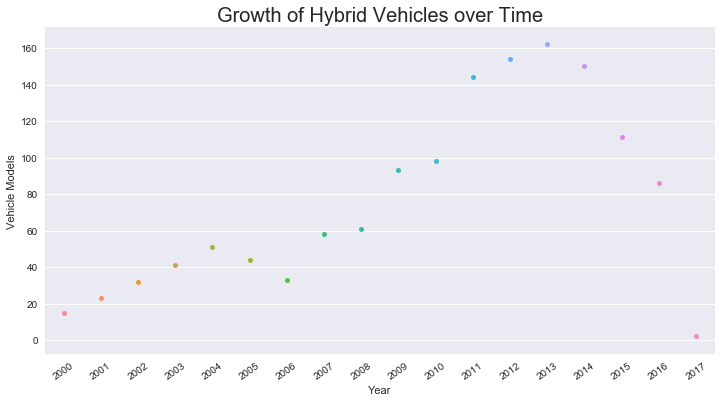

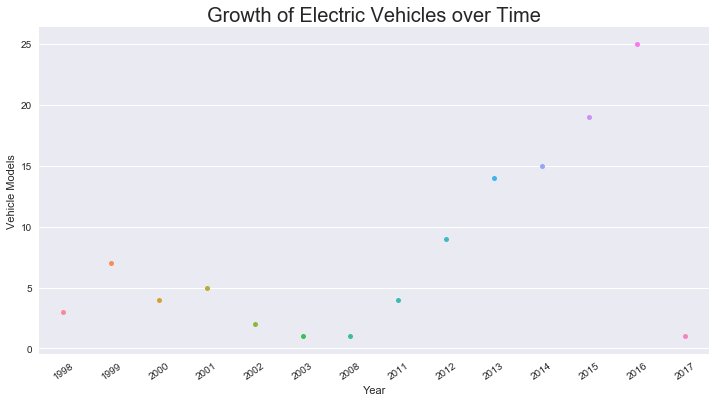

In [98]:
#create a simple data frame with year and model count for hybrid cars
hybrids = df.loc[(df['fuelType2?'] == 1)]
hybridAgg = pd.DataFrame(columns = ['Year', 'Vehicle Models'])
sums = dict(hybrids.groupby('year').size())
for year, count in sums.items():
    hybridAgg = hybridAgg.append([{'Year': year, 'Vehicle Models': count}])

#create a simple data frame with year and model count for electric cars
electrics = df.loc[(df['electric?'] == 1)]
electricAgg = pd.DataFrame(columns = ['Year', 'Vehicle Models'])
sums = dict(electrics.groupby('year').size())
for year, count in sums.items():
    electricAgg = electricAgg.append([{'Year': year, 'Vehicle Models': count}])

#plot each data frame as a stripplot
plt.figure(figsize=(12,6))
hybridPlot = sns.stripplot(x='Year', y='Vehicle Models', data=hybridAgg)
plt.title('Growth of Hybrid Vehicles over Time', fontsize=20)
hybridPlot.set_xticklabels(hybridAgg['Year'].astype(int), rotation=35)
sns.plt.show()
plt.figure(figsize=(12,6))
electricPlot = sns.stripplot(x='Year', y='Vehicle Models', data=electricAgg)
plt.title('Growth of Electric Vehicles over Time', fontsize=20)
electricPlot.set_xticklabels(electricAgg['Year'].astype(int), rotation=35)
sns.plt.show()

We see that hybrid vehicles were first introduced to the American market in 2000, with electric cars being introduced two years prior. The number of hybrid models has appears to have grown steadily ever since their introduction. There's a bit of a dropoff in the models offered in 2015 and 2016 compared to prior years, but this may be because not all vehicles made in those years have been added to the dataset yet. As for electric vehicle models, after some intial growth from 1998-2003, only one model was produced between 2003 and 2010 before production took off again in 2011. An interesting trend that can be seen in both plots is a spike in growth for the number of models offered each year from 2011 onward, which may be a reaction by car manufacturers to the EPA's 2010 fuel economy regulations.

Let's next see how hybrid vehicle technology has improved over time by creating violin plots for the city and highway fuel economies of such vehicles and the CO<sub>2</sub> grams output by hybrid vehicles per mile vs the year.

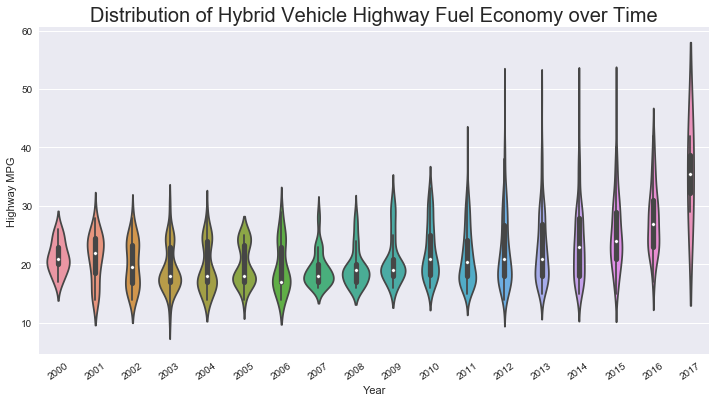

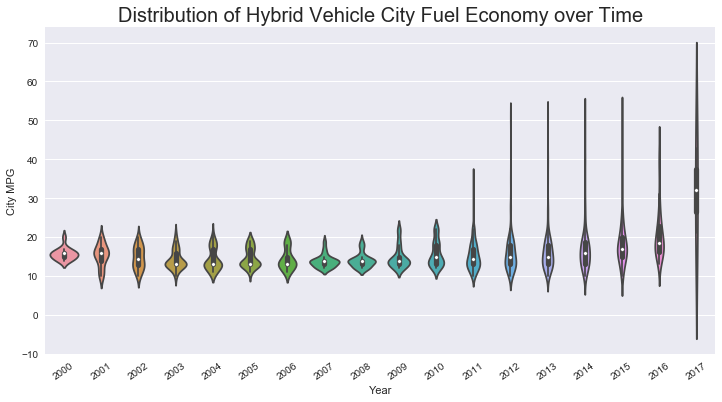

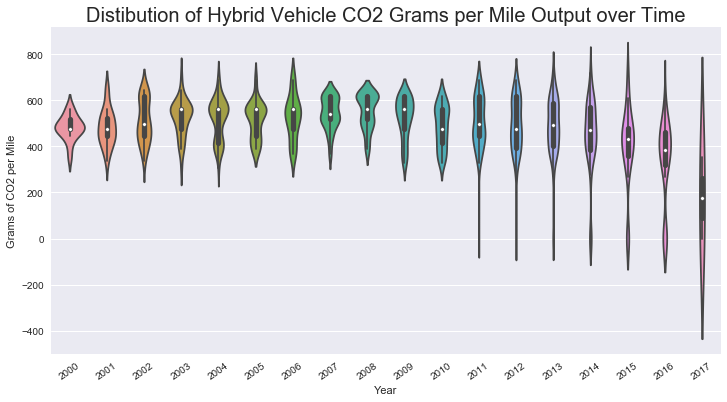

In [99]:
#create violin plot for highway08 vs. year for hybrid cars
plt.figure(figsize=(12,6))
hybridPlot = sns.violinplot(x='year', y='highway08', data=hybrids)
plt.title('Distribution of Hybrid Vehicle Highway Fuel Economy over Time', fontsize=20)
hybridPlot.set_xticklabels(hybrids['year'].unique().astype(int), rotation=35)
hybridPlot.set(xlabel='Year', ylabel='Highway MPG')
sns.plt.show()

#create violin plot for city08 vs. year for hybrid cars
plt.figure(figsize=(12,6))
hybridPlot = sns.violinplot(x='year', y='city08', data=hybrids)
plt.title('Distribution of Hybrid Vehicle City Fuel Economy over Time', fontsize=20)
hybridPlot.set_xticklabels(hybrids['year'].unique().astype(int), rotation=35)
hybridPlot.set(xlabel='Year', ylabel='City MPG')
sns.plt.show()

#create violin plot for co2TailpipeAGpm vs. year for hybrid cars
plt.figure(figsize=(12,6))
hybridPlot = sns.violinplot(x='year', y='co2TailpipeAGpm', data=hybrids)
plt.title('Distibution of Hybrid Vehicle CO2 Grams per Mile Output over Time', fontsize=20)
hybridPlot.set_xticklabels(hybrids['year'].unique().astype(int), rotation=35)
hybridPlot.set(xlabel='Year', ylabel='Grams of CO2 per Mile')
sns.plt.show()

From the first plot, we see that the mean hybrid vehicle city mpg has stayed roughly even from 2000 to 2013 and began increasing afterwards. This is much the same case for highway mpg, though this fuel efficiency measure appears to vary more each year compared to city mpg. From 2011 on, both measures have a noticeable right skew indicating that some newer vehicles have significantly higher fuel efficiencies. The final plot follows an inverse pattern comapred to the other two, which is indicative that CO<sub>2</sub> grams emitted per mile is very much a function of a car's fuel economy. While the mean grams emitted per mile remained roughly just above 500 from 2000 to 2009, the means starts decreasing afterwards, with distributions skewing left. In fact, the later year distributions appear to suggest that some cars have a negative CO<sub>2</sub> grams/mile measure. Is this even possible?

In [100]:
print('Minimum CO2 grams/mile any car achieves:', min(df['co2TailpipeAGpm']))

Minimum CO2 grams/mile any car achieves: 0.0


It appears that it's only the variance captured in the violin plots which suggests some cars consume rather than emit CO<sub>2</sub> while driven. Still, the fact that some cars achieve 0 grams/mile is pretty impressive. A number of such [zero carbon footprint cars](http://www.hybridcars.com/americas-lowest-carbon-footprint-cars/) are available from most major car brands.

Let's also see how electric cars are improving over time. We'll look at trends in their battery capacity in kilowatt-hours as well as their city and highway [miles per gallon equivalences](https://www.cnet.com/roadshow/videos/car-tech-101-mpge-explained/) (MPGe).

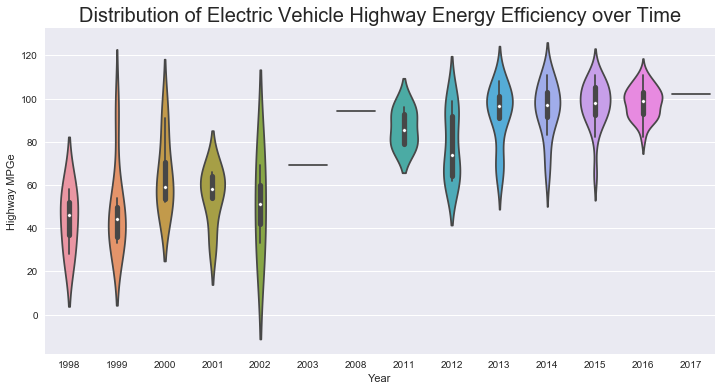

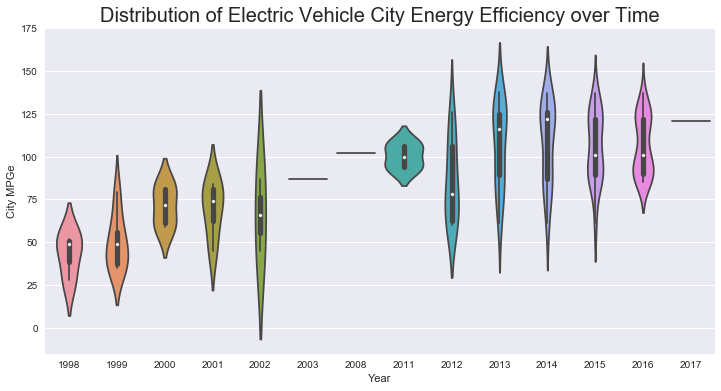

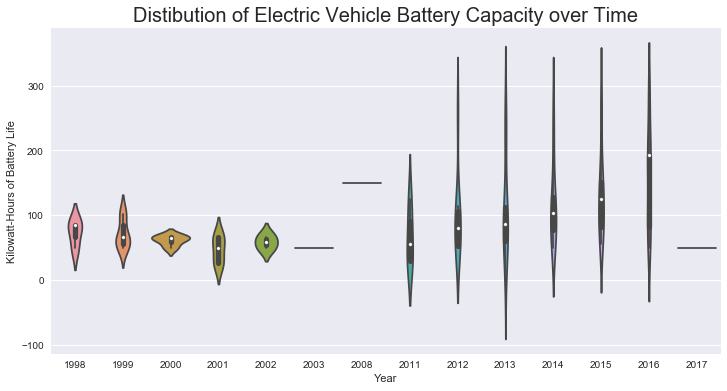

In [101]:
#create violin plot for highway08 vs. year for electric cars
plt.figure(figsize=(12,6))
electricPlot = sns.violinplot(x='year', y='highway08', data=electrics)
plt.title('Distribution of Electric Vehicle Highway Energy Efficiency over Time', fontsize=20)
electricPlot.set(xlabel='Year', ylabel='Highway MPGe')
sns.plt.show()

#create violin plot for city8 vs. year for electric cars
plt.figure(figsize=(12,6))
electricPlot = sns.violinplot(x='year', y='city08', data=electrics)
plt.title('Distribution of Electric Vehicle City Energy Efficiency over Time', fontsize=20)
electricPlot.set(xlabel='Year', ylabel='City MPGe')
sns.plt.show()

#create violin plot for kwHrs vs. year for electric cars
plt.figure(figsize=(12,6))
electricPlot = sns.violinplot(x='year', y='kwHrs', data=electrics)
plt.title('Distibution of Electric Vehicle Battery Capacity over Time', fontsize=20)
electricPlot.set(xlabel='Year', ylabel='Kilowatt-Hours of Battery Life')
sns.plt.show()

Our first two plots reveal that both city and highway energy efficiencies of electric vehicles have been improving since their inception. Both the mean city and mean hwy MPGe of electric vehicles appears to thave grown nearly linearally over time. An interesting observation is that the mean city MPGe is often equal to or higher than the mean highway MPGe each year for electric cars, suggesting that electric cars require more energy to drive on highways than in cities. Our earlier plots for all vehicles showed the exact opposite is often true for cars in general. Overall through, we can see that the latest electric cars are roughly 4 times more energy efficient than the average car sold in America. The latest electric cars achieve nearly 100 MPGe in cities and on the highway, when comparing yearly mean MPG measures from our earlier plots to those above.

Our final plot shows battery technology has began improving for electric vehicles since 2011 onwards after relative stagnation from 1998-2002, though battery capacity varies greatly among different models. The battery capacity growth rate since 2011 is notably impressive as well; from 50kWh in 2011, the mean battery capcity of electric vehicles doubled by 2014 and nearly doubled again by 2016. Electric car batteries [have been improving in many other aspects](http://www.pocket-lint.com/news/130380-future-batteries-coming-soon-charge-in-seconds-last-months-and-power-over-the-air) as well including the average charging time.

## IV: What Determines a Car's Fuel Economy?

City08 and Highway08 regressions and analysis here

## V: Summary

Sum up all results of sections 2-4.